In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
IMG_DIR = 'images/'

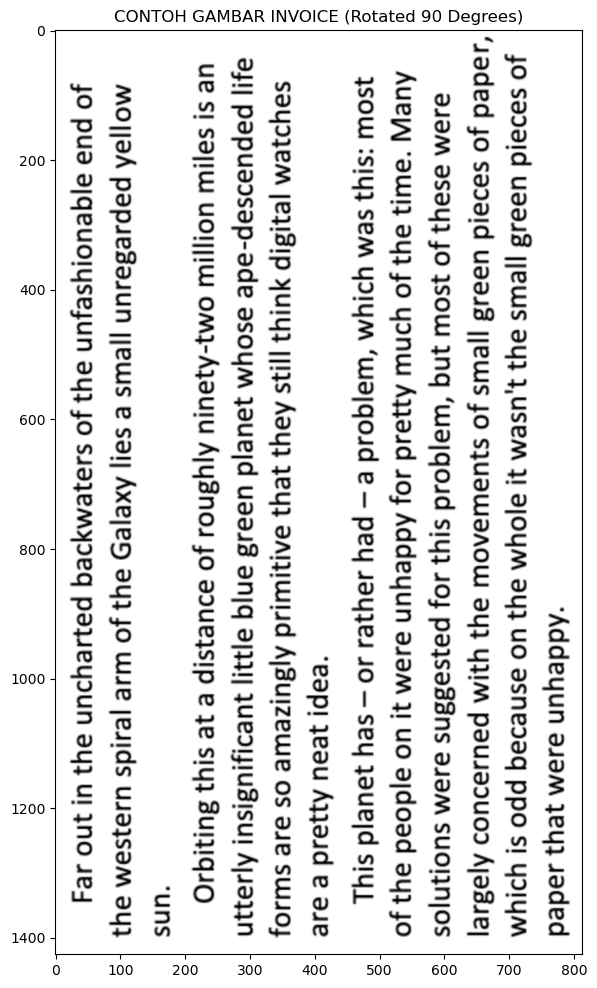

In [48]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_rotated_img = cv2.merge([r, g, b])

# Menampilkan gambar yang telah diputar
plt.figure(figsize=(16, 12))
plt.imshow(rgb_rotated_img)
plt.title('CONTOH GAMBAR INVOICE (Rotated 90 Degrees)')
plt.show()


In [60]:
# Use Tesseract to detect text orientation and script
try:
    # Get orientation and script information
    custom_config = r'--oem 1'  # Use LSTM OCR Engine (OEM 1)
    script_info = pytesseract.image_to_osd(rotated_image, config=custom_config)

    # Extract orientation and script from result
    lines = script_info.split('\n')
    orientation_info = [line for line in lines if line.startswith('Orientation in degrees:')]
    script_info = [line for line in lines if line.startswith('Script:')]
    orientation_degrees = int(orientation_info[0].split(': ')[1])
    script_used = script_info[0].split(': ')[1]
    # Display the orientation and script information
    print(f"Orientation in degrees: {orientation_degrees}")
    print(f"Script used: {script_used}")

except Exception as e:
    print(f"Error: {e}")

Orientation in degrees: 0
Script used: Latin


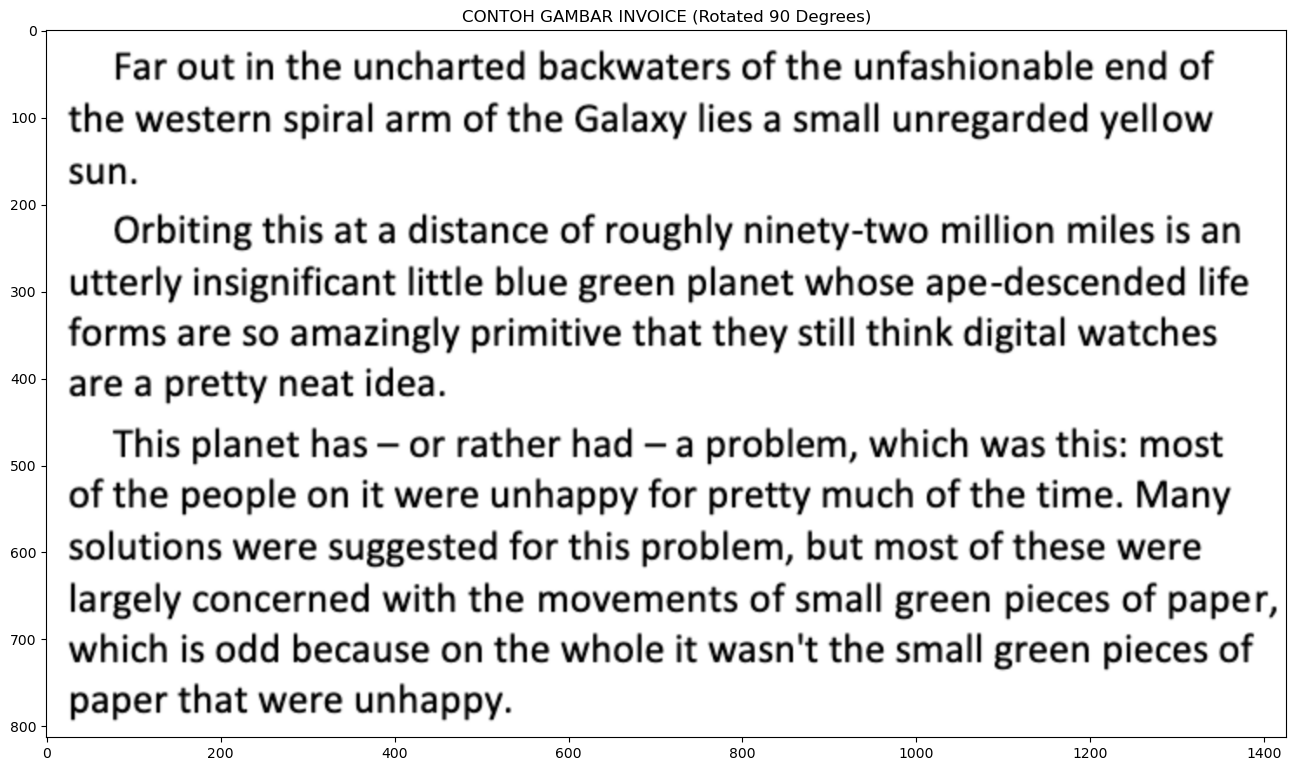

In [50]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

 # Memutar gambar sebesar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(rotated_image)
rgb_rotated_img = cv2.merge([r, g, b])

# Menampilkan gambar yang telah diputar
plt.figure(figsize=(16, 12))
plt.imshow(rgb_rotated_img)
plt.title('CONTOH GAMBAR INVOICE (Rotated 90 Degrees)')
plt.show()


In [59]:
# Use Tesseract to detect text orientation and script
try:
    # Get orientation and script information
    custom_config = r'--oem 1' 
    script_info = pytesseract.image_to_osd(rotated_image, config=custom_config)

    # Extract orientation and script from result
    lines = script_info.split('\n')
    orientation_info = [line for line in lines if line.startswith('Orientation in degrees:')]
    script_info = [line for line in lines if line.startswith('Script:')]
    orientation_degrees = int(orientation_info[0].split(': ')[1])
    script_used = script_info[0].split(': ')[1]
    # Display the orientation and script information
    print(f"Orientation in degrees: {orientation_degrees}")
    print(f"Script used: {script_used}")

except Exception as e:
    print(f"Error: {e}")

Orientation in degrees: 0
Script used: Latin


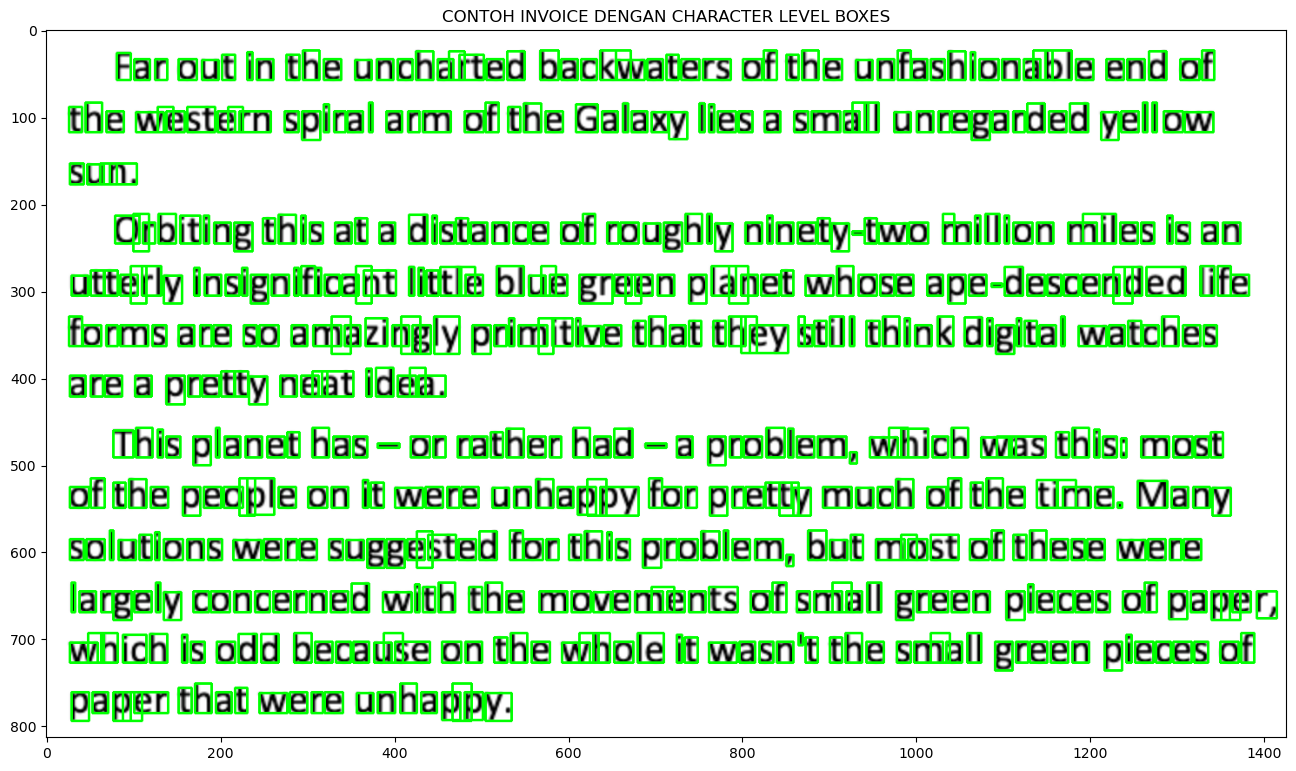

In [23]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memutar gambar sebesar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = rotated_image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(rotated_image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    rotated_image = cv2.rectangle(rotated_image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()


In [37]:
# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(rotated_image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())


DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


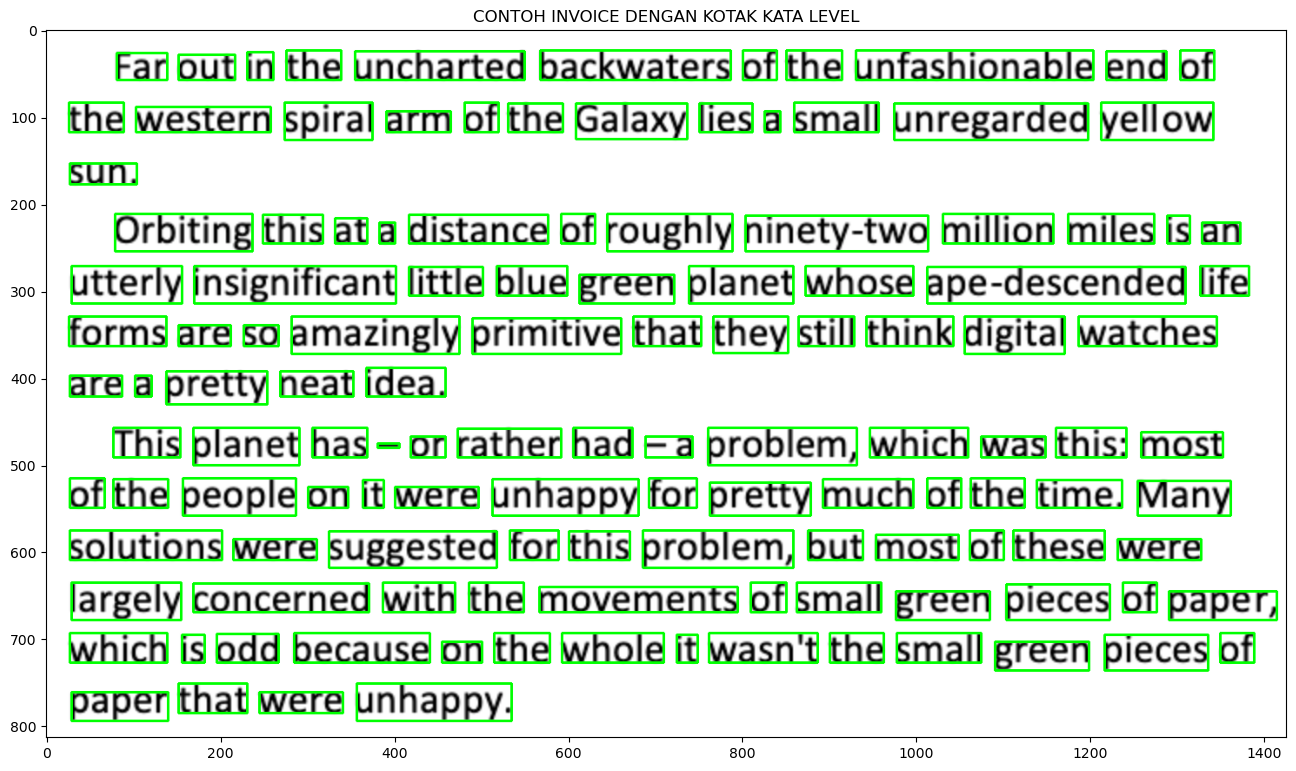

Far out in the uncharted backwaters of the unfashionable end of the western spiral arm of the Galaxy lies a small unregarded yellow sun. Orbiting this at a distance of roughly ninety-two million miles is an utterly insignificant little blue green planet whose ape-descended life forms are so amazingly primitive that they still think digital watches are a pretty neat idea. This planet has — or rather had —a problem, which was this: most of the people on it were unhappy for pretty much of the time. Many solutions were suggested for this problem, but most of these were largely concerned with the movements of small green pieces of paper, which is odd because on the whole it wasn't the small green pieces of paper that were unhappy. 


In [42]:
n_boxes = len(d['text'])
detected_paragraph = ""
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        rotated_image = cv2.rectangle(rotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        detected_paragraph += d['text'][i] + " "

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()

print(detected_paragraph)

Unrotated

In [56]:
custom_config = r'-l eng --oem 3 --psm 6'
print("Original Configuration:\n", pytesseract.image_to_string(image, config=custom_config))

# Try different configurations
configs_to_try = [
    r'-l eng --oem 3 --psm 6',  # Original configuration
    r'-l eng --oem 3 --psm 3',  # PSM 3: Fully automatic page segmentation, but no OSD or OCR
    # Add more configurations to try
]

for config in configs_to_try:
    print(f"\nConfiguration: {config}")
    print(pytesseract.image_to_string(image, config=config))


Original Configuration:
 -

ar)

> oa 8
i]

S£u 8289

c= ¥ See ss

s 2 YDS F= oso
oO - os ES :

oO i 3 a) ie 3 3 8
T= Yves Z¢eee
sg 82% att

£ $= E 238
vo 2 = 25
>a wo Sas gees
me! ro) " S52

2 no]
= of aS E
GS Swe a3 Ese
£5 Zgs cEEsES
22 £55 p52 be

o> 37 S222
ve & 3
oG cy > S255 8
8 s&s aca 25
So oOo; 5852
o 4 2st e585
Y= @es IS OES
2 > > os Besse
Ss 2 vy Ba?
25 - o> see es
66 ree = BES oS.
Gy YvSse ESS gs x
a Sse 235 es
os c°s sazece

o w . te 5°
BE eeeg basse
=< £ SERRE REE ES
G6 5s :
c * ro SSOgE 3

o 8 ae
2 5 ese aah hs 3
+ $5 o> FB
z2 S695 2 fe) <x
rn wm BAS a2e8os
ce cegsake28 5
38 a SFes
+ oO Eon eessey
e 2e¢ FESm20a
°o 3 > o 23% :

7] SPE FEZ Be
PeeOREs on =
“£5 es

Sa


Configuration: -l eng --oem 3 --psm 6
-

ar)

> oa 8
i]

S£u 8289

c= ¥ See ss

s 2 YDS F= oso
oO - os ES :

oO i 3 a) ie 3 3 8
T= Yves Z¢eee
sg 82% att

£ $= E 238
vo 2 = 25
>a wo Sas gees
me! ro) " S52

2 no]
= of aS E
GS Swe a3 Ese
£5 Zgs cEEsES
22 £55 p52 be

o> 37 S222
ve & 3
oG cy > S255 8
8 s&s aca 25


Rotated

In [67]:
from langdetect import detect
custom_config = r'-l eng --oem 3 --psm 6'
detected_text = pytesseract.image_to_string(rotated_image, config=custom_config)
detected_language = detect(detected_text)
print("Original Configuration:\n")
print("Script: "+ detected_language)
print(detected_text)
# Try different configurations
configs_to_try = [
    r'-l eng --oem 3 --psm 6',  # Original configuration
    r'-l eng --oem 3 --psm 3',  # PSM 3: Fully automatic page segmentation, but no OSD or OCR
    # Add more configurations to try
]

for config in configs_to_try:
    print(f"\nConfiguration: {config}")
    print(pytesseract.image_to_string(rotated_image, config=config))


Original Configuration:

Script: en
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.


Configuration: -l eng --oem 3 --psm 6
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-tw